In [1]:
!nvidia-smi

Tue Aug 25 16:19:27 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# References

  - https://joeddav.github.io/blog/2020/05/29/ZSL.html
  - https://towardsdatascience.com/zero-shot-text-classification-with-hugging-face-7f533ba83cd6

In [4]:
!pip3 install GetOldTweets3

In [13]:
!pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-4eqfbdqe
  Running command git clone -q https://github.com/huggingface/transformers.git /tmp/pip-req-build-4eqfbdqe
     |████████████████████████████████| 3.0MB 7.9MB/s 
  Created wheel for transformers: filename=transformers-3.0.2-cp36-none-any.whl size=873359 sha256=110225e29501e7c518364146fc31a00bcc4ddceaf7aabf4f986bd31715a33361
  Stored in directory: /tmp/pip-ephem-wheel-cache-zard82gr/wheels/33/eb/3b/4bf5dd835e865e472d4fc0754f35ac0edb08fe852e8f21655f
Successfully built transformers
  Found existing installation: tokenizers 0.8.1rc1
    Uninstalling tokenizers-0.8.1rc1:
      Successfully uninstalled tokenizers-0.8.1rc1


In [1]:
import pandas as pd
import GetOldTweets3 as gt
import seaborn as sb
import matplotlib.pyplot as plt
from tqdm import tqdm

from transformers import pipeline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
classifier = pipeline("zero-shot-classification")

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
sequence = "Who are you voting for in 2020?"
candidate_labels = ["politics", "public health", "economics"]

classifier(sequence, candidate_labels)

{'labels': ['politics', 'economics', 'public health'],
 'scores': [0.972518801689148, 0.014584233984351158, 0.01289702020585537],
 'sequence': 'Who are you voting for in 2020?'}

In [7]:
sequence = "Who are you voting for in 2020?"
candidate_labels = ["politics", "elections", "economics"]

classifier(sequence, candidate_labels, multi_class=True)

{'labels': ['politics', 'elections', 'economics'],
 'scores': [0.9720695614814758, 0.9676108360290527, 0.006164491176605225],
 'sequence': 'Who are you voting for in 2020?'}

In [9]:
sequence = "I hated this movie. The acting sucked."
candidate_labels = ["positive", "negative"]
classifier(sequence, candidate_labels)

{'labels': ['negative', 'positive'],
 'scores': [0.9916267991065979, 0.008373209275305271],
 'sequence': 'I hated this movie. The acting sucked.'}

In [54]:
sequences = [
    "I hated this movie. The acting sucked.",
    "This movie didn't quite live up to my high expectations, but overall I still really enjoyed it."
]
candidate_labels = ["foo", "bar"]

classifier(sequences, candidate_labels)

[{'labels': ['foo', 'bar'],
  'scores': [0.5867575407028198, 0.41324248909950256],
  'sequence': 'I hated this movie. The acting sucked.'},
 {'labels': ['foo', 'bar'],
  'scores': [0.6042276620864868, 0.3957723379135132],
  'sequence': "This movie didn't quite live up to my high expectations, but overall I still really enjoyed it."}]

In [11]:
sequences = [
    "I hated this movie. The acting sucked.",
    "This movie didn't quite live up to my high expectations, but overall I still really enjoyed it."
]
candidate_labels = ["positive", "negative"]
hypothesis_template = "The sentiment of this review is {}."

classifier(sequences, candidate_labels, hypothesis_template=hypothesis_template)

[{'labels': ['negative', 'positive'],
  'scores': [0.9890093207359314, 0.0109906867146492],
  'sequence': 'I hated this movie. The acting sucked.'},
 {'labels': ['positive', 'negative'],
  'scores': [0.9581227898597717, 0.04187718778848648],
  'sequence': "This movie didn't quite live up to my high expectations, but overall I still really enjoyed it."}]

In [49]:
tweetCriteria = gt.manager.TweetCriteria().setQuerySearch('india corona')\
                                           .setSince("2020-02-01")\
                                           .setUntil("2020-04-30")\
                                           .setMaxTweets(10)
tweets = gt.manager.TweetManager.getTweets(tweetCriteria)

In [52]:
candidate_labels = ["sickness", "pandemic", "refugees","hospitals","management"]

labels_present = []
scores = []

for t in tweets:
  result = classifier(t.text, candidate_labels)
  if (result['scores'][0]>.5):
    labels_present.append(result['labels'][0])
    scores.append(result['scores'][0])
  else:
    print ('Unable to process sequence ->', t.text)

Unable to process sequence -> Future History textbooks be like- The Government of India announced demonetisation of all 500 and 1000 rupee banknotes on 8 Nov 2016 BC(Before Corona).


[]

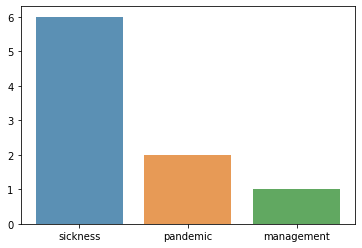

In [53]:
labels_df=pd.DataFrame(data=labels_present,columns=['labels'])
labels_count = labels_df['labels'].value_counts()
sb.barplot(labels_count.index,labels_count.values,alpha=0.8)
plt.plot()